In [35]:
EXPERIMENT_IDENTIFIER = "multiple_genre"

In [9]:
!pip install -q -U google-generativeai
!pip install python-dotenv
!pip install pandas
!pip install joblib
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [60]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

In [11]:
!ls ../data

description_style_frequency_ethnic5132_100_exp2.png
description_style_frequency_ethnic5132_100.png
description_style_frequency_nonethnic5133_100_exp2.png
description_style_frequency_nonethnic5133_100.png
description_style_frequency.png
ethnic_100_gemini15Flash_annotated.csv
ethnic_100_gemini15Flash_annotated_exp2.csv
ethnic-article-finding-process.png
ethnic_dataset_4893_after_removing_rakhain.csv
ethnic_dataset_cleaned.joblib
ethnic_dataset_exp0_5342_gemini1.5flash_annotate_1_100.joblib
ethnic_dataset_exp0_5342_gemini1.5flash_annotate_1_100_nonethnic.joblib
ethnic_dataset.joblib
genre_frequency_ethnic5132_100_exp2.png
genre_frequency_nonethnic5133_100_exp2.png
genre_frequency_nonethnic5133_100.png
genre_frequency.png
nonethnic_100_gemini15Flash_annotated.csv
nonethnic_100_gemini15Flash_annotated_exp2.csv
nonethnic_dataset_exp0_5342_gemini1.5flash_annotate_1_100.joblib
nonethnic_dataset.joblib
SolaimanLipi.ttf


### Library Codes

In [67]:
import os
import google.generativeai as genai
import json

def get_response_from_gemini(articles):
    genai.configure(api_key=os.environ["GEMINI_API_KEY"])

    # Create the model
    generation_config = {
      "temperature": 1,
      "top_p": 0.95,
      "top_k": 64,
      "max_output_tokens": 8192,
      "response_mime_type": "text/plain",
    }
    
    model = genai.GenerativeModel(
      model_name="gemini-1.5-flash",
      generation_config=generation_config,
      # safety_settings = Adjust safety settings
      # See https://ai.google.dev/gemini-api/docs/safety-settings
    )
    responses = []
    for index,article in enumerate(articles):
        response = model.generate_content([
          "You are a Bangla news article analyzer. I will give you a news article and you will say which genre(s) it belongs to. The genres are:  Politics, Crime, International Affairs,  Business & Economy,  Sports,  Culture & Entertainment,  Jobs,  Lifestyle,  Health,  Environment,  Local,  Education,  Technology,  Religion,  Science,  Protests and Social Movements, Govt Actions.  Additionally, you will also say if the description is Straight, Investigation, Commentary. Identify the perspective of any ethnic person mentioned in the article, choosing from the following categories: Subject, Spokesperson, Expert or Commentator, Personal Experience, Popular Opinion, Eyewitness. Return me just a json of {'genre': [GENRE(s)], 'description_style': STYLE, 'perspective': PERSPECTIVE}.",
          "News Article: আন্তর্জাতিক\\n আদিবাসী দিবস উপলক্ষে বুধবার বিভিন্ন স্থানে সভা-সমাবেশ ও রযালি অনুষ্ঠিত \\nহয়েছে। উপজাতিদের\\n বিভিন্ন সংগঠন এসব কর্মসূচির আয়োজন করে। যুগান্তর ব্যুরো ও প্রতিনিধিদের \\nপাঠানো খবর-সিলেট ব্যুরো : রযালিতে সিলেট প্রেস ক্লাবের সভাপতি ইকরামুল \\nকবির, ইমজার সভাপতি আল আজাদসহ সিলেটের সাংস্কৃতিক অঙ্গনের ব্যক্তি ও উপজাতি\\n জনগোষ্ঠীর লোকজন ছাড়াও বিভিন্ন শ্রেণী-পেশার মানুষ অংশগ্রহণ করেন। এছাড়া \\nদিবসটি উপলক্ষে শাহজালাল বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়ে আলোচনা সভা \\nঅনুষ্ঠিত হয়েছে। ‘অ্যাসোসিয়েশন অব ইন্ডিজেনাস স্টুডেন্টস, সাস্ট’ ও \\nসমাজকর্ম বিভাগ আলাদা আলাদাভাবে দিবসটি উপলক্ষে রযালি, সেমিনার ও আলোচনা \\nসভার আয়োজন করে।ময়মনসিংহ ব্যুরো : অনুষ্ঠানের উদ্বোধন করেন জেলা পরিষদের \\nচেয়ারম্যান অধ্যাপক ইউসুফ খান পাঠান। বক্তব্য রাখেন হিন্দু বৌদ্ধ খ্রিস্টান\\n ঐক্য পরিষদের সভাপতি বিকাশ রায়, সিপিবি সভাপতি এমদাদুল হক মিল্লাত, মহিলা \\nপরিষদের সভানেত্রী ফেরদৌস আরা মাহমুদা হেলেন, হিল্লুুল নকরেক, অরণ্য-ই \\nচিরান, স্বর্ণকান্ত হাজং সাংবাদিক \\nশরীফুজ্জামান টিটু প্রমুখ।শেরপুর : বাগাছাস সভাপতি রুনু নকরেটের সভাপতিত্বে\\n অনুষ্ঠিত আলোচনা সভায় প্রধান অতিথি ছিলেন ঝিনাইগাতী উপজেলা চেয়ারম্যান \\nআমিনুল ইসলাম বাদশা। বক্তব্য রাখেন, উপজেলা ভাইস চেয়ারম্যান আমিরুর ইসলাম \\nমক্কু, বাগাছাসের কেন্দ্রীয় কমিটি সাবেক সভাপতি পবিত্র ম্র্রং, সাংবাদিক \\nরফিক মজিদ, উপজাতি ছাত্রনেতা নিরু চিরান, \\nরবি কোচ, সত্যজিৎ মৃ প্রমুখ।কলমাকান্দা (নেত্রকোনা) : হাটগোবিন্দপুর \\nবিদ্যালয় মাঠে অনুষ্ঠানে বক্তব্য রাখেন উপজেলা ভাইস চেয়ারম্যান কলি আক্তার,\\n পপি সিডস প্রোগ্রাম ম্যানেজার শরিফুল ইসলাম, টিউলিপ ম্রং, অশোক চিসিম, \\nইউলসন কুবি প্রমুখ।দুর্গাপুর (নেত্রকোনা) : রযালি শেষে টিডব্লিউএ’র সভাপতি \\nবঙ্কিম মানখিনের সভাপতিত্বে সভায় উপজাতি \\nনেতা সায়মন তজুর সঞ্চালনায় প্রধান অতিথি ছিলেন সহকারী কমিশনার ভূমি মো. \\nইয়ামিন হোসেন। বক্তব্য রাখেন ভারপ্রাপ্ত পুলিশ কর্মকর্তা মিজানুর রহমান, \\nআদিবাসী নারীনেত্রী স্বপ্না হাজং, লুদিয়া রুমা সাংমা, এনজিও সমন্বয় পরিষদের\\n সভাপতি মি. পঙ্কজ মারাক, স্বপন হাজং প্রমুখ।শ্রীমঙ্গল : বুধবার রযালি ও \\nপথসভার উদ্বোধন করেন বৃহত্তম আদিবাসী ফোরামের সহ-সভাপতি জিডিসন প্রধান \\nসুচিয়াং। উপস্থিত ছিলেন সংগঠনের মহাসচিব ফিলা পত্মি, চা জনগোষ্ঠী আদিবাসী\\n ফ্রন্টের সভাপতি পরিমল সিং বাড়াইক, খাসি সোসিয়াল কাউন্সিলের সাজু মারছিয়াং\\n প্রমুখ।ধোবাউড়া (ময়মনসিংহ) : আলোচনা সভায় বাগাছাস ধোবাউড়া শাখার সভাপতি \\nসাগর ডিব্রার সভাপতিত্বে বক্তব্য রাখেন ট্রাইবাল ওয়েলফেয়ার অ্যাসোসিয়েশনের \\nচেয়ারম্যান এডুয়ার্ট নাফাক, ভাইস চেয়ারম্যান হেরোথ চিরান, বাগাছাস \\nকেন্দ্রীয় প্রচার সম্পাদক শক্তি চিরান, ধোবাউড়া শাখার সম্পাদক ন্যান্সি \\nডিব্রা প্রমুখ।কলাপাড়া : সভায় সভাপতিত্ব করেন রাখাইন মংচো।\\n প্রধান অতিথির বক্তব্য রাখেন উপজেলা চেয়ারম্যান আবদুল মোতালেব তালুকদার। \\nবিশেষ অতিথি ছিলেন ইউএনও এবিএম সাদিকুর রহমান, কৃষি কর্মকর্তা মসিউর রহমান,\\n অধ্যক্ষ ড. শহীদুল ইসলাম বিশ্বাস, মাহমুদুর রহমান, সাংবাদিক জসিম পারভেজ, \\nরাখাইন চোথেন মং ও অংনয় প্রমুখ।হালুয়াঘাট (ময়মনসিংহ) : গারো\\n স্টুডন্ট ইউনিয়ন (গাসু) এবং সেন্টএন্ড্রুজ বয়েজ ও সেন্ট মেরিস গার্লস \\nসিএমডি হোস্টেলের নেতারা অংশগ্রহণে একটি রযালি হালুয়াঘাট বাজার প্রদক্ষিণ \\nকরে।",
          "output: {'genre': ['Culture & Entertainment'],'description_style': 'Commentary', 'perspective': 'Spokesperson'}",
          f"News Article: {article}",
          "output: ",
        ])
        print(f"{index}){response.text}")
        responses.append(response)
    return responses

def post_process_gemini_1_5_flash_response_to_json(text):
    json_string = text.replace("```", "").replace("json","").replace("\n","").replace("'", '"')
    json_output = json.loads(json_string)
    return json_output

### Ethnic Artciles

In [62]:
import pandas as pd
ethnic_df = pd.read_csv("../data/ethnic_dataset_4893_after_removing_rakhain.csv")
ethnic_df

,Unnamed: 0,content
0,0,রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গ...
1,1,"নারায়ণগঞ্জের রূপগঞ্জ ও ফতুল্লা, গাজীপুরের কালি..."
2,2,গাইবান্ধার গোবিন্দগঞ্জের রংপুর চিনিকলের সাহেবগ...
3,3,চাঞ্চল্যকর পিলখানা হত্যা মামলায় ডেথ রেফারেন্স ...
4,4,অবাধে মাটি কেটে নেয়ার ধ্বংসের দ্বারপ্রান্তে ধো...
...,...,...
4888,4888,খাগড়াছড়ির দীঘিনালায় জেএসএস (এমএন লারমা) সমর্থি...
4889,4889,শান্তি-সম্প্রীতি স্থাপনে দুই দশক আগে পার্বত্য ...
4890,4890,জনপ্রিয় ম্যাগাজিন অনুষ্ঠান ‘ইত্যাদি’ আজ শুক্রব...
4891,4891,সরকারি বেতন স্কেলের নবম থেকে ১৩তম গ্রেড পর্যন্...


In [63]:
N = 50

In [64]:
ethnic_sample_df = ethnic_df.sample(n=N, random_state=3)
ethnic_sample_df

,Unnamed: 0,content
1182,1182,রাঙ্গামাটিতে আওয়ামী লীগে ভর্তি আতঙ্ক ছড়িয়ে পড়ে...
961,961,রাঙামাটির লংগদু উপজেলায় সশস্ত্র দুই গ্রুপের সং...
4584,4584,ব্রাহ্মণবাড়িয়ার আখাউড়া উপজেলায় ভারতের ত্রিপুরা...
1790,1790,ভৌগলিক সীমারেখা ভুলে কেবল ভাষার টানে দুই বাংলা...
848,848,চাঁদাবাজির ১১ লাখ টাকাসহ পার্বত্য চট্টগ্রাম জন...
115,115,পার্বত্য চট্টগ্রাম আঞ্চলিক পরিষদ চেয়ারম্যান জ্...
1259,1259,সীমান্তপথে বাংলাদেশে প্রবেশকালে ভারতের মিজোরাম...
4565,4565,রাঙ্গামাটির কাউখালীতে বাঁশের সাঁকো দিয়ে ঝুঁকিপ...
591,591,ইউপিডিএফ খাগড়াছড়ি জেলার সমন্বয়ক উজ্জ্বল স্মৃতি...
3585,3585,টানা অনাবৃষ্টির কারণে পাহাড়ি ছড়াগুলোর অধিকাংশই...


In [68]:
responses = get_response_from_gemini(ethnic_df["content"].values.tolist()[:N])

0)```json
{'genre': ['Crime', 'Protests and Social Movements', 'Local', 'Politics'], 'description_style': 'Straight', 'perspective': 'Subject'}
```
1)```json
{'genre': ['Crime'], 'description_style': 'Straight', 'perspective': 'Subject'}
```
2)```json
{'genre': ['Crime', 'Local', 'Protests and Social Movements'], 'description_style': 'Straight', 'perspective': 'Spokesperson'}
```
3)```json
{'genre': ['Crime', 'Politics'], 'description_style': 'Straight', 'perspective': 'Subject'}
```
4)```json
{'genre': ['Environment', 'Local', 'Govt Actions'], 'description_style': 'Investigation', 'perspective': 'Eyewitness'}
```
5)```json
{'genre': ['Culture & Entertainment', 'Politics', 'Protests and Social Movements', 'Local'], 'description_style': 'Commentary', 'perspective': 'Commentator'}
```
6)```json
{'genre': ['Crime', 'Local'], 'description_style': 'Straight', 'perspective': 'Subject'}
```
7)```json
{'genre': ['Local', 'Culture & Entertainment'], 'description_style': 'Straight', 'perspective

ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

In [ ]:
ethnic_sample_df["Genre"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["genre"] for response in responses]
ethnic_sample_df["Description Style"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["description_style"] for response in responses]
ethnic_sample_df["Perspective"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["perspective"] for response in responses]

ethnic_sample_df.head()

In [ ]:
ethnic_sample_df.to_csv(f"../data/ethnic_{N}_gemini15Flash_annotated_{EXPERIMENT_IDENTIFIER}.csv")

In [ ]:
import matplotlib.pyplot as plt

style_counts = ethnic_df['Description Style'].value_counts()

plt.figure(figsize=(4, 3))
plt.title('Frequency of Description Styles (Ethnic Articles)')
plt.xlabel('Description Style')
plt.ylabel('Frequency')
plt.savefig(f'../data/description_style_frequency_ethnic5132_{N}_{EXPERIMENT_IDENTIFIER}.png')
plt.show()

In [ ]:
from collections import Counter
all_genres = [genre for sublist in ethnic_df['Genre'] for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Plot the data
plt.figure(figsize=(6, 4))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'../data/genre_frequency_ethnic5132_{N}_{EXPERIMENT_IDENTIFIER}.png')
plt.show()

### Non Ethnic Data

In [2]:
import joblib
import pandas as pd
nonethnic_articles = joblib.load("../data/nonethnic_dataset.joblib")
nonethnic_df = pd.DataFrame()
nonethnic_df["content"] = nonethnic_articles
nonethnic_df.head()

,content
0,<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দ...
1,<p>রাজধানী ঢাকার ২১টি এলাকা চিকুনগুনিয়া বিস্তা...
2,<p>আজ বৃহস্পতিবার সচিবালয়ে স্বাস্থ্য অধিদপ্তরে...
3,<p>চিকুনগুনিয়া ও ডেঙ্গু প্রতিরোধে আতঙ্ক না ছড়ি...
4,<p>সভায় স্বাস্থ্যসেবা বিভাগের সচিব সিরাজুল হক ...


In [4]:
nonethnic_articles[342]

'<p>গত সপ্তাহে সরেজমিনে দেখা গেছে, ভবন নির্মাণ প্রায় শেষের পথে। পর্যবেক্ষণ টাওয়ারের চারটি সিঁড়ির কাজ শেষ হয়ে এখন চলছে অন্যান্য কাজ। এক কিলোমিটার দীর্ঘ ১৫ ফুট চওড়া রাস্তা হবে চিরিঙ্গি থেকে। বনের ভেতরে সৃষ্ট প্রাকৃতিক একটি মেঠোপথকে পাকা রাস্তায় রূপান্তর করা হবে। এ রাস্তার জন্য কাটা পড়বে অনেক গাছ।<br />প্রকল্প অনুযায়ী, আগামী অর্থবছরের মধ্যে টাওয়ার, ভবন ও রাস্তা নির্মাণকাজ সম্পন্ন হবে। বাকি কাজ হবে পরবর্তী অর্থবছরে। সিলেট ডিএফওর কার্যালয়ের প্রস্তাবে এসব অবকাঠামো নির্মাণ করা হচ্ছে সরাসরি বন বিভাগের ‘ওয়াইল্ডলাইফ অ্যান্ড নেচার কনজারভেশন সার্কেল’-এর মাধ্যমে।<br />যোগাযোগ করলে সিলেটের সহকারী বন সংরক্ষক পরিমল চন্দ্র পাল প্রথম আলোর কাছে রাতারগুলের উন্নয়নে এসব হচ্ছে বলে জানান। বনের মধ্যে টাওয়ার, ভবন ও রাস্তা নির্মাণ করে বন সংরক্ষণ কীভাবে হবে—এমন প্রশ্নের জবাবে তিনি বলেন, ‘আসলে এ বিষয়ে আমি পুরোপুরি জানি না। এ ব্যাপারে ডিএফও (বিভাগীয় বন কর্মকর্তা) ভালো জানেন।’<br />সিলেটের ডিএফও দেলওয়ার হোসেন বলেন, ‘আমি এ পদে নতুন যোগ দিয়েছি। রাতারগুলে কিছু উন্নয়ন কর্মকাণ্ড হচ্ছে, এটা শুনেছি। তবে বিস্তারিত কিছু বলতে

In [185]:
responses = get_response_from_gemini(nonethnic_df["content"].values.tolist()[:N])

0)```json
{"genre": ["Culture", "Entertainment"], "description_style": "Straight"}
```
1)```json
{"genre": ["Health"], "description_style": "Straight"}
```


In [8]:
nonethnic_df = nonethnic_df.iloc[:N, ]
nonethnic_df["Genre"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["genre"] for response in responses]
nonethnic_df["Description Style"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["description_style"] for response in responses]

nonethnic_df.head()

NameError: name 'nonethnic_df' is not defined

In [187]:
nonethnic_df.to_csv(f"../data/nonethnic_100_gemini15Flash_annotated_{EXPERIMENT_IDENTIFIER}.csv")

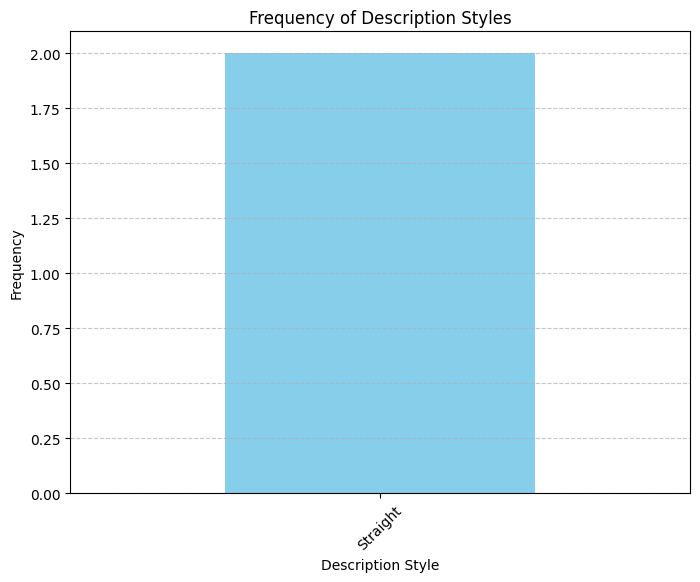

In [188]:
style_counts = nonethnic_df['Description Style'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
style_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Description Styles')
plt.xlabel('Description Style')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'../data/description_style_frequency_nonethnic5133_100_{EXPERIMENT_IDENTIFIER}.png')
plt.show()

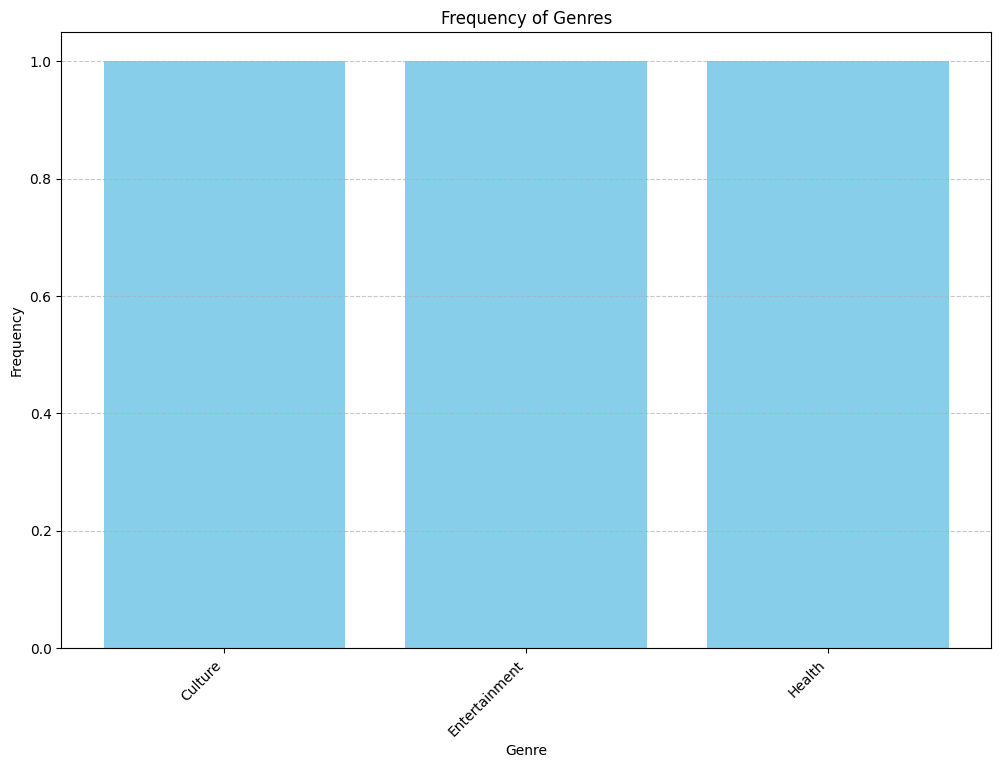

In [189]:
from collections import Counter
all_genres = [genre for sublist in nonethnic_df['Genre'] for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'../data/genre_frequency_nonethnic5133_100_{EXPERIMENT_IDENTIFIER}.png')
plt.show()